<a href="https://colab.research.google.com/github/Alanjamlu34/Web-Scraping-IMDB-Movie-Reviews/blob/main/Analisis_Review_save_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf

# Read Dataset

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# Load the data from the specified path
data_path = "/content/gdrive/MyDrive/Dicoding/data.csv"
df = pd.read_csv(data_path)
df.head()

,Date,overview,Stars,Review
0,25 May 2005,Life's Lessons in one Movie...,10.0,When I first saw this movie I didn't appreciat...
1,8 April 2002,A beautiful fable for now and the future,10.0,I believe everyone has a right to their opinio...
2,10 June 2002,Let's see the world through the eyes of Forres...,10.0,"""I've made about 20 films and 5 of them are pr..."
3,14 May 2007,"In my opinion, no film has touched me more tha...",10.0,"Quite simply, the greatest film ever made.Humo..."
4,20 June 2005,The zen of Forrest Gump.,10.0,This is a powerful yet charming movie; fun for...


# Preprocessing Data

## Maping data

In [4]:
# Mapping dictionary for Stars column
stars_mapping = {
    0: 'buruk', 1: 'buruk', 2: 'buruk', 3: 'buruk',
    4: 'netral', 5: 'netral', 6: 'netral', 7: 'netral',
    8: 'bagus', 9: 'bagus', 10: 'bagus'
}

# Map the Stars column to categorical labels
df['Label'] = df['Stars'].map(stars_mapping)

## Split Dataset

In [5]:

# Split the data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Initialize sentences and labels lists for training
training_sentences = train_df['Review'].tolist()
training_labels = train_df['Label'].tolist()

# Initialize sentences and labels lists for testing
testing_sentences = test_df['Review'].tolist()
testing_labels = test_df['Label'].tolist()

# Convert labels lists to numpy arrays
label_mapping = {'buruk': 0, 'netral': 1, 'bagus': 2}
training_labels_final = np.array([label_mapping[label] for label in training_labels])
testing_labels_final = np.array([label_mapping[label] for label in testing_labels])

## Remove Stopword

In [6]:
# Function to remove stopwords
def remove_stopwords(sentence):
    stopwords = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at",
                 "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did",
                 "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have",
                 "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself",
                 "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's",
                 "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only",
                 "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd",
                 "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs",
                 "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're",
                 "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we",
                 "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's",
                 "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll",
                 "you're", "you've", "your", "yours", "yourself", "yourselves"]

    sentence = sentence.lower()
    words = sentence.split()
    no_stopwords = [w for w in words if w not in stopwords]
    return " ".join(no_stopwords)

# Clean the sentences by removing stopwords
training_sentences = [remove_stopwords(sentence) for sentence in training_sentences]
testing_sentences = [remove_stopwords(sentence) for sentence in testing_sentences]

## Set Parameter

In [7]:
# Parameters
vocab_size = 10000
max_length = 100
embedding_dim = 2000
trunc_type = 'post'
oov_tok = "<OOV>"

# Tokenize and Padding

In [8]:
# Clear previous models and sessions
tf.keras.backend.clear_session()

In [9]:
# Initialize the Tokenizer class
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

# Generate the word index dictionary for the training sentences
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

# Generate and pad the training sequences
train_sequences = tokenizer.texts_to_sequences(training_sentences)
train_padded = pad_sequences(train_sequences, maxlen=max_length, truncating=trunc_type)

# Generate and pad the test sequences
test_sequences = tokenizer.texts_to_sequences(testing_sentences)
test_padded = pad_sequences(test_sequences, maxlen=max_length, truncating=trunc_type)

1. Inisialisasi Tokenizer
 - Tokenizer: Menginisialisasi kelas Tokenizer dari Keras untuk mempersiapkan teks agar dapat diproses oleh model.
 - num_words: Menentukan jumlah maksimum kata yang akan dipertimbangkan dalam tokenizer berdasarkan frekuensi.
 - oov_token: Menentukan token yang akan digunakan untuk kata-kata yang tidak ditemukan dalam vocab_size (out-of-vocabulary).

2. Membuat Kamus Kata untuk Kalimat Pelatihan
 - fit_on_texts: Melatih tokenizer pada kalimat pelatihan untuk membuat kamus kata.
 - word_index: Kamus kata yang dihasilkan, di mana setiap kata diberikan indeks unik.

3. Membuat dan Mengisi Sequence Pelatihan
 - texts_to_sequences: Mengonversi kalimat pelatihan menjadi urutan indeks berdasarkan kamus kata (word_index).
 - pad_sequences: Mengisi (padding) urutan indeks agar memiliki panjang yang sama (max_length). truncating menentukan cara memotong urutan yang lebih panjang dari max_length.

4. Membuat dan Mengisi Sequence Pengujian
 - texts_to_sequences: Mengonversi kalimat pengujian menjadi urutan indeks seperti pada kalimat pelatihan.
 - pad_sequences: Mengisi urutan indeks untuk kalimat pengujian agar memiliki panjang yang sama (max_length).



# Model **1**

## Model ARC

In [10]:
# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # 3 neurons for 'buruk', 'netral', 'bagus'
])


## Compile and Train Model 1

In [11]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=7)

In [12]:
# Setup the training parameters
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['sparse_categorical_accuracy'])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 2000)         20000000  
                                                                 
 global_average_pooling1d (  (None, 2000)              0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 6)                 12006     
                                                                 
 dense_1 (Dense)             (None, 3)                 21        
                                                                 
Total params: 20012027 (76.34 MB)
Trainable params: 20012027 (76.34 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### ReadME

- tf.keras.Sequential: Menginisialisasi model Sequential dari Keras yang memungkinkan pembuatan layer secara berurutan.
- Embedding: Layer embedding yang mengonversi indeks kata menjadi vektor dengan dimensi tertentu (embedding_dim). input_length adalah panjang maksimum urutan kata.
- GlobalAveragePooling1D: Layer pooling yang mengurangi dimensi dengan mengambil rata-rata dari semua vektor dalam urutan, menghasilkan satu vektor per urutan.
- Dense: Layer Dense dengan 6 neuron dan fungsi aktivasi relu, untuk menambah kompleksitas dan kemampuan belajar non-linear.
- Dense: Layer Dense dengan 3 neuron dan fungsi aktivasi softmax, untuk menghasilkan probabilitas untuk 3 kelas output ('buruk', 'netral', 'bagus').
- Model ini dirancang untuk klasifikasi teks ke dalam tiga kategori dengan menggunakan embedding kata dan layer pooling untuk mengurangi dimensi sebelum klasifikasi.

## Train

In [13]:
# Train the model
history = model.fit(train_padded, training_labels_final, epochs=100, validation_data=(test_padded, testing_labels_final), verbose=2, callbacks = [early_stop])

Epoch 1/100
75/75 - 15s - loss: 0.8483 - sparse_categorical_accuracy: 0.7546 - val_loss: 0.5808 - val_sparse_categorical_accuracy: 0.8737 - 15s/epoch - 201ms/step
Epoch 2/100
75/75 - 16s - loss: 0.5028 - sparse_categorical_accuracy: 0.8708 - val_loss: 0.4508 - val_sparse_categorical_accuracy: 0.8737 - 16s/epoch - 218ms/step
Epoch 3/100
75/75 - 15s - loss: 0.4103 - sparse_categorical_accuracy: 0.8708 - val_loss: 0.4071 - val_sparse_categorical_accuracy: 0.8737 - 15s/epoch - 198ms/step
Epoch 4/100
75/75 - 8s - loss: 0.3507 - sparse_categorical_accuracy: 0.8725 - val_loss: 0.3789 - val_sparse_categorical_accuracy: 0.8687 - 8s/epoch - 105ms/step
Epoch 5/100
75/75 - 7s - loss: 0.2846 - sparse_categorical_accuracy: 0.8977 - val_loss: 0.3697 - val_sparse_categorical_accuracy: 0.8754 - 7s/epoch - 87ms/step
Epoch 6/100
75/75 - 7s - loss: 0.2178 - sparse_categorical_accuracy: 0.9129 - val_loss: 0.3801 - val_sparse_categorical_accuracy: 0.8721 - 7s/epoch - 88ms/step
Epoch 7/100
75/75 - 6s - loss:

# Model 2

In [ ]:
# Hyperparameters
embedding_dim = embedding_dim
lstm_dim = 64
dense_dim = 64

# Build the model
# Build the model
model2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Print the model summary
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 64)          640000    
                                                                 
 bidirectional (Bidirection  (None, 128)               66048     
 al)                                                             
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 3)                 195       
                                                                 
Total params: 714499 (2.73 MB)
Trainable params: 714499 (2.73 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Setup the training parameters
model2.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['sparse_categorical_accuracy'])

# Train the model
history2 = model2.fit(train_padded, training_labels_final, epochs=100, validation_data=(test_padded, testing_labels_final), verbose=2, callbacks = [early_stop])

Epoch 1/100
75/75 - 15s - loss: 0.5750 - sparse_categorical_accuracy: 0.8569 - val_loss: 0.4338 - val_sparse_categorical_accuracy: 0.8737 - 15s/epoch - 194ms/step
Epoch 2/100
75/75 - 8s - loss: 0.3722 - sparse_categorical_accuracy: 0.8742 - val_loss: 0.3989 - val_sparse_categorical_accuracy: 0.8721 - 8s/epoch - 103ms/step
Epoch 3/100
75/75 - 5s - loss: 0.2092 - sparse_categorical_accuracy: 0.9099 - val_loss: 0.4407 - val_sparse_categorical_accuracy: 0.8367 - 5s/epoch - 69ms/step
Epoch 4/100
75/75 - 5s - loss: 0.1316 - sparse_categorical_accuracy: 0.9377 - val_loss: 0.5725 - val_sparse_categorical_accuracy: 0.8535 - 5s/epoch - 65ms/step
Epoch 5/100
75/75 - 7s - loss: 0.0900 - sparse_categorical_accuracy: 0.9571 - val_loss: 0.6654 - val_sparse_categorical_accuracy: 0.8350 - 7s/epoch - 93ms/step
Epoch 6/100
75/75 - 3s - loss: 0.0683 - sparse_categorical_accuracy: 0.9710 - val_loss: 0.9105 - val_sparse_categorical_accuracy: 0.8670 - 3s/epoch - 42ms/step
Epoch 7/100
75/75 - 4s - loss: 0.046

# Visualize Model Acc

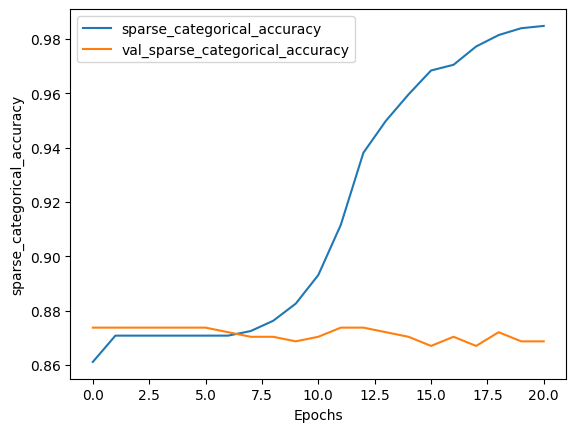

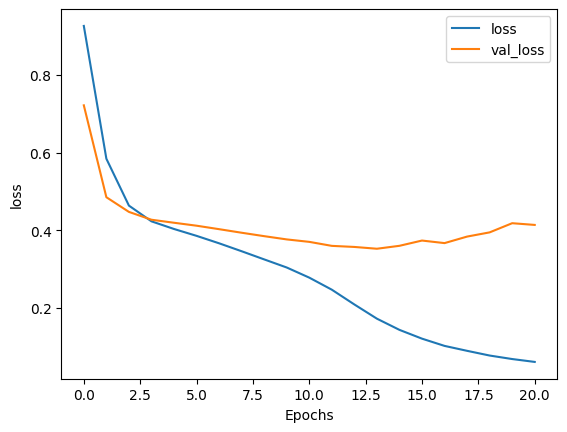

In [ ]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and results
plot_graphs(history, "sparse_categorical_accuracy")
plot_graphs(history, "loss")

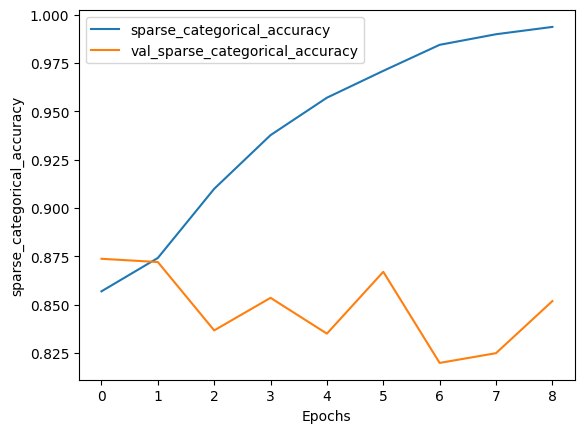

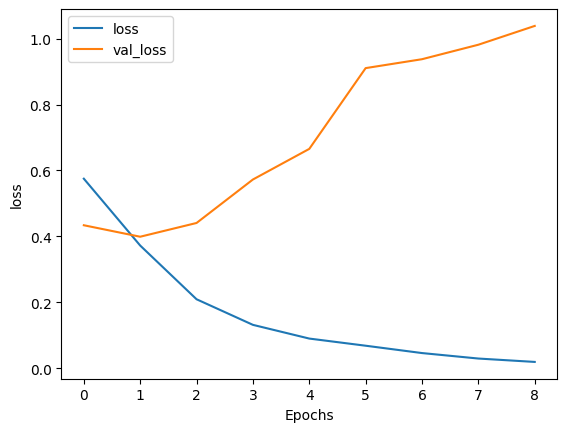

In [ ]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history2.history[string])
  plt.plot(history2.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and results
plot_graphs(history2, "sparse_categorical_accuracy")
plot_graphs(history2, "loss")

# Visualize Word Embeddings
Kode Berikut tidak perlu dijalankan.
Download file .TSV [di sini](https://drive.google.com/drive/folders/1oyENkkB3_0_Nw-F_T1KxcgacQ6e8oyWo?usp=sharing) saja.

In [ ]:
# Get the embedding layer from the model (i.e. first layer)
embedding_layer = model.layers[0]

# Get the weights of the embedding layer
embedding_weights = embedding_layer.get_weights()[0]

# Print the shape. Expected is (vocab_size, embedding_dim)
print(embedding_weights.shape)

(10000, 64)


In [ ]:
# Get the index-word dictionary
reverse_word_index = tokenizer.index_word

In [ ]:
import io

# Open writeable files
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')

# Initialize the loop. Start counting at `1` because `0` is just for the padding
for word_num in range(1, vocab_size):

  # Get the word associated at the current index
  word_name = reverse_word_index[word_num]

  # Get the embedding weights associated with the current index
  word_embedding = embedding_weights[word_num]

  # Write the word name
  out_m.write(word_name + "\n")

  # Write the word embedding
  out_v.write('\t'.join([str(x) for x in word_embedding]) + "\n")

# Close the files
out_v.close()
out_m.close()

```
#  Import files utilities in Colab
try:
  from google.colab import files
except ImportError:
  pass

# Download the files
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')
```

# Save Model

In [ ]:
import os

# Specifies the model directory
model_dir = '/tmp/saved_model'

try:
    os.mkdir(model_dir)
    print(f"Directory '{model_dir}' created successfully.")
except OSError as e:
    print(f"Error creating directory: {e}")


In [21]:
# Save model with save_model
model_version = 1
tf.saved_model.save(
    model,
    export_dir = os.path.join(model_dir, str(model_version))
)

In [23]:
!zip -r /tmp/saved_model.zip /tmp/saved_model

  adding: tmp/saved_model/ (stored 0%)
  adding: tmp/saved_model/1/ (stored 0%)
  adding: tmp/saved_model/1/saved_model.pb (deflated 86%)
  adding: tmp/saved_model/1/fingerprint.pb (stored 0%)
  adding: tmp/saved_model/1/assets/ (stored 0%)
  adding: tmp/saved_model/1/variables/ (stored 0%)
  adding: tmp/saved_model/1/variables/variables.data-00000-of-00001 (deflated 23%)
  adding: tmp/saved_model/1/variables/variables.index (deflated 58%)


In [33]:
from google.colab import files

files.download('/tmp/saved_model.zip')
print('`saved model.zip` has been downloaded')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

`saved model.zip` has been downloaded
